In [ ]:
!git clone https://github.com/Huoyongtony/memristive-neurons.git

Cloning into 'memristive-neurons'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 78.82 KiB | 455.00 KiB/s, done.


# Introduciton

This notebook aims to implement the simplest excitable neuron with memristive conductance.

Generally, the dynamic equation of the neuron is:

$$\tau_f \dot{v_f}=-v_f+v$$
$$\tau_s \dot{v_s}=-v_s+v$$
$$m=\text{ReLu}(v_f+v_m)$$
$$h=1-\text{ReLu}(v_s+v_h)$$
$$n=\text{ReLu}(v_s+v_n)$$
$$\dot{v}=-Rv-g_1mh(v-v_E)-g_2n(v-v_I)$$

For a simple spiking neuron we only need two time scale hence we can let $\tau_f$ be 1, making it close to the time scale of the voltage.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [126]:
def Relu(x):
    return x * (x > 0)

def ss_muti_inital(x,u):
    dx=np.zeros(x.shape)
    dx[:,1]=(-x[:,1]+x[:,0])/1
    dx[:,2]=(-x[:,2]+x[:,0])/25

    leak=0.1*x[:,0]

    fast_postive=Relu(x[:,1]+1)
    slow_inactivation=1-Relu(x[:,2])
    slow_negative=Relu(x[:,2]+3)

    dx[:,0]=-leak-fast_postive*slow_inactivation*(x[:,0]-5)-slow_negative*(x[:,0]+3)+u

    return dx

In [127]:
Time=220
Num_sample=2200
dt=Time/Num_sample

In [128]:
num_neuron=1

x0=np.random.rand(num_neuron,3)
x=np.copy(x0)
outputs=[x0]

for i in range(Num_sample):

    u=np.ones(num_neuron)*4

    dx=ss_muti_inital(x,u)

    x=x+dx*dt


    outputs.append(x)

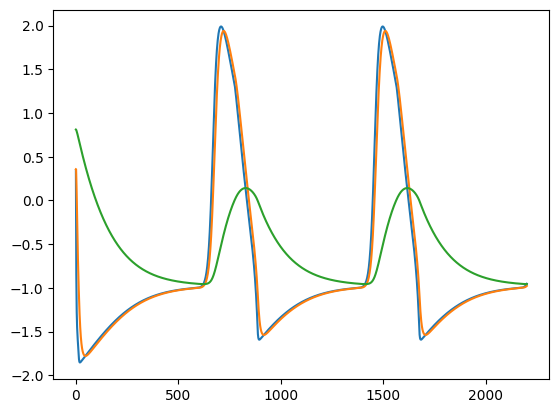

In [129]:
plt.plot(np.array(outputs)[:,:,0])
plt.plot(np.array(outputs)[:,:,1])
plt.plot(np.array(outputs)[:,:,2])

We have made a simple spiking neuron.

# I-V curve

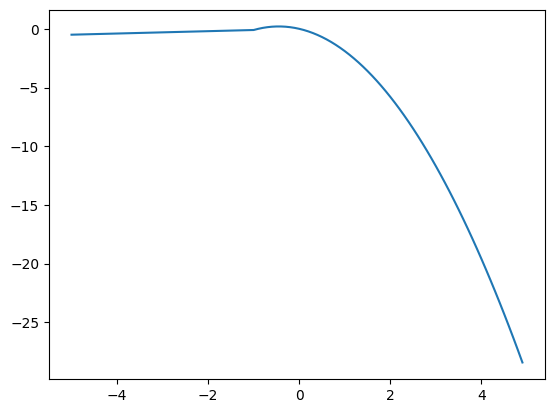

In [14]:
V=np.arange(-5,5,0.1)
I=0.1*V-Relu(V+1)*(1-Relu(0))*V
plt.plot(V,I)

# Design

## spiking neuron
Generalisation

$$\tau_f \dot{v_f}=-v_f+v$$
$$\tau_s \dot{v_s}=-v_s+v$$
$$m=\text{ReLu}(v_f+v_m)$$
$$h=1-\text{ReLu}(\alpha_h(v_s+v_h))$$
$$n=\text{ReLu}(v_s+v_n)$$
$$\dot{v}=-Rv-g_1mh(v-v_E)-g_2n(v-v_I)$$

Hypothesis

*   Amplitude is determine by $V_E$ and $V_I$
*   Frequency determine by $\tau_f$ and $\tau_s$
*   Bification point is $v_m$
*   $v_m$ need to be lager or equal to $v_h$ and $v_n$ (not sure the effect of making v_m larger, but if they are equal it always works)
*   range of current that the neuron spike is determine by the distance between $g_1$ and $g_2$ (larger distance -> larger range)






In [228]:
def Relu(x):
    return x * (x > 0)

def ss_muti_inital(x,u):
    dx=np.zeros(x.shape)
    dx[:,1]=(-x[:,1]+x[:,0])/1
    dx[:,2]=(-x[:,2]+x[:,0])/50

    leak=0.1*x[:,0]

    fast_postive=Relu(x[:,1]-1)
    slow_inactivation=1-Relu(x[:,2]-1)
    slow_negative=Relu(x[:,2]-1)

    dx[:,0]=-leak-fast_postive*slow_inactivation*(x[:,0]-15)-2*slow_negative*(x[:,0]+4)+u

    return dx

In [231]:
num_neuron=1

x0=np.random.rand(num_neuron,3)
x=np.copy(x0)
outputs=[x0]

for i in range(Num_sample):

    u=np.ones(num_neuron)*1

    dx=ss_muti_inital(x,u)

    x=x+dx*dt


    outputs.append(x)

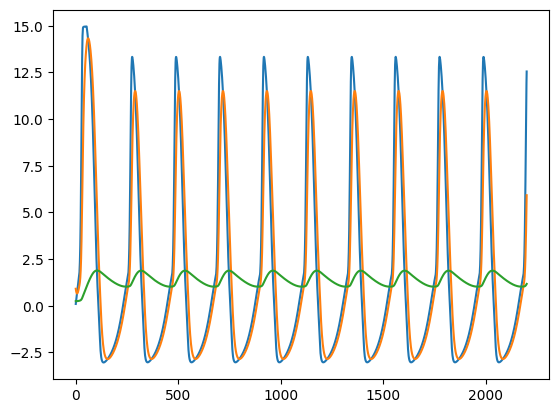

In [232]:
plt.plot(np.array(outputs)[:,:,0])
plt.plot(np.array(outputs)[:,:,1])
plt.plot(np.array(outputs)[:,:,2])